In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
# pd.read_csv를 통해 dataframe 형태로 읽어옴.
corona_all = pd.read_csv("서울시 코로나19 확진자 현황.csv")

In [53]:
corona_all.head()

,연번,확진일,환자번호,국적,환자정보,지역,여행력,접촉력,조치사항,상태,이동경로,등록일,수정일,노출여부
0,5748,10.21.,25530,NaN,NaN,양천구,NaN,감염경로 조사중,NaN,NaN,NaN,2020-10-22 10:58,2020-10-22 10:58,Y
1,5747,10.21.,25528,NaN,NaN,강동구,NaN,강남서초 지인모임,NaN,NaN,NaN,2020-10-22 10:58,2020-10-22 10:58,Y
2,5746,10.21.,25525,NaN,NaN,강남구,NaN,기타 확진자 접촉,NaN,NaN,NaN,2020-10-22 10:58,2020-10-22 10:58,Y
3,5745,10.21.,25517,NaN,NaN,관악구,NaN,감염경로 조사중,NaN,NaN,NaN,2020-10-22 10:58,2020-10-22 10:58,Y
4,5744,10.21.,25504,NaN,NaN,관악구,NaN,기타 확진자 접촉,NaN,NaN,NaN,2020-10-22 10:58,2020-10-22 10:58,Y


In [54]:
# dataframe 정보를 요약하여 출력.
corona_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5748 entries, 0 to 5747
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   연번      5748 non-null   int64  
 1   확진일     5748 non-null   object 
 2   환자번호    5748 non-null   int64  
 3   국적      0 non-null      float64
 4   환자정보    0 non-null      float64
 5   지역      5748 non-null   object 
 6   여행력     459 non-null    object 
 7   접촉력     5748 non-null   object 
 8   조치사항    0 non-null      float64
 9   상태      5357 non-null   object 
 10  이동경로    5520 non-null   object 
 11  등록일     5748 non-null   object 
 12  수정일     5748 non-null   object 
 13  노출여부    5748 non-null   object 
dtypes: float64(3), int64(2), object(9)
memory usage: 628.8+ KB


In [55]:
# drop 함수를 사용해 국적, 환자정보, 조치사항 column 데이터를 삭제.
corona_del_col = corona_all.drop(columns= ['국적', '환자정보', '조치사항'])
corona_del_col.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5748 entries, 0 to 5747
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   연번      5748 non-null   int64 
 1   확진일     5748 non-null   object
 2   환자번호    5748 non-null   int64 
 3   지역      5748 non-null   object
 4   여행력     459 non-null    object
 5   접촉력     5748 non-null   object
 6   상태      5357 non-null   object
 7   이동경로    5520 non-null   object
 8   등록일     5748 non-null   object
 9   수정일     5748 non-null   object
 10  노출여부    5748 non-null   object
dtypes: int64(2), object(9)
memory usage: 494.1+ KB


In [56]:
corona_del_col['확진일']

0       10.21.
1       10.21.
2       10.21.
3       10.21.
4       10.21.
         ...  
5743     1.31.
5744     1.30.
5745     1.30.
5746     1.30.
5747     1.24.
Name: 확진일, Length: 5748, dtype: object

In [57]:
#dataframe에 추가하기 전, 임시로 데이터를 저장해 둘 list를 선언.
month = []
day = []

for data in corona_del_col['확진일']:
    # split 함수를 사용하여 월, 일을 나누어 list에 저장.
    month.append(data.split('.')[0])
    day.append(data.split('.')[1])

In [58]:
#corona_del_col에 'month', 'day' column을 생성하며 동시에 list에 임시 저장된 데이터를 입력함.
corona_del_col['month'] = month
corona_del_col['day'] = day

corona_del_col['month'].astype('int64')
corona_del_col['day'].astype('int64')

0       21
1       21
2       21
3       21
4       21
        ..
5743    31
5744    30
5745    30
5746    30
5747    24
Name: day, Length: 5748, dtype: int64

In [59]:
# 그래프에서 x축의 순서를 정리하기 위하여 order list를 생성.
order = []
for i in range(1, 11):
    order.append(str(i))

order

['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']

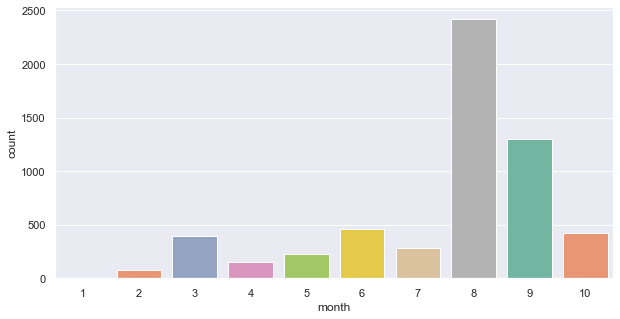

In [60]:
#그래프 사이즈 조절
plt.figure(figsize=(10,5))

#seaborn의 countplot 함수를 사용하여 출력.
sns.set(style="darkgrid")
ax = sns.countplot(x = "month", data = corona_del_col, palette = "Set2",order = order)

<AxesSubplot:>

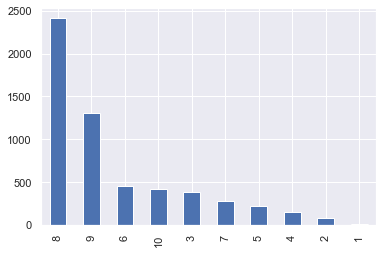

In [61]:
# Series의 plot 함수를 사용한 출력 방법도 있음.
corona_del_col['month'].value_counts().plot(kind='bar')

In [62]:
# value_counts()는 각 데이터를 세이서 내림차순으로 정리하는 함수.
corona_del_col['month'].value_counts()

8     2416
9     1304
6      460
10     425
3      391
7      281
5      228
4      156
2       80
1        7
Name: month, dtype: int64

In [63]:
# 8월달 일별 확진자 수 출력하기.
# 그래프에서 x축의 순서를 정리하기 위해 order list를 생성.
order2 = []
for i in range(1,32):
    order2.append(str(i))

order2

['1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '30',
 '31']

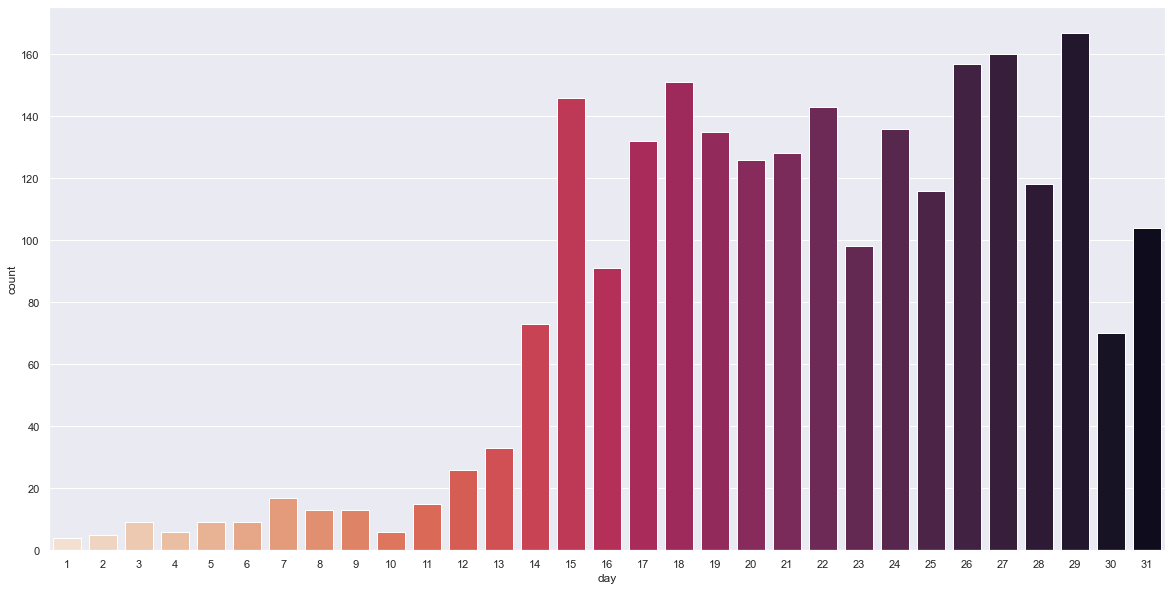

In [65]:
# seabora의 countplot 함수를 사용하여 출력함.
plt.figure(figsize=(20,10))
sns.set(style="darkgrid")
ax = sns.countplot(x = "day", data= corona_del_col[corona_del_col['month'] == '8'], palette="rocket_r", order = order2)

In [67]:
# 8월 평균 일별 확진자 수 구하기 (quiz1)
# corona_del_col[corona_del_col['month'] == '8']['day'].count()/31
# corona_del_col[corona_Del_col['month'] == '8']['day'].value_counts().mean()
corona_del_col[corona_del_col['month'] == '8']['day'].count()/31

77.93548387096774

In [68]:
# 지역별 확진자 수 출력
corona_del_col['지역']

0       양천구
1       강동구
2       강남구
3       관악구
4       관악구
       ... 
5743    성북구
5744    마포구
5745    종로구
5746    중랑구
5747    강서구
Name: 지역, Length: 5748, dtype: object

In [69]:
import matplotlib.font_manager as fm

font_dirs = ['/usr/share/fonts/truetype/nanum', ]
font_files = fm.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    fm.fontManager.addfont(font_file)

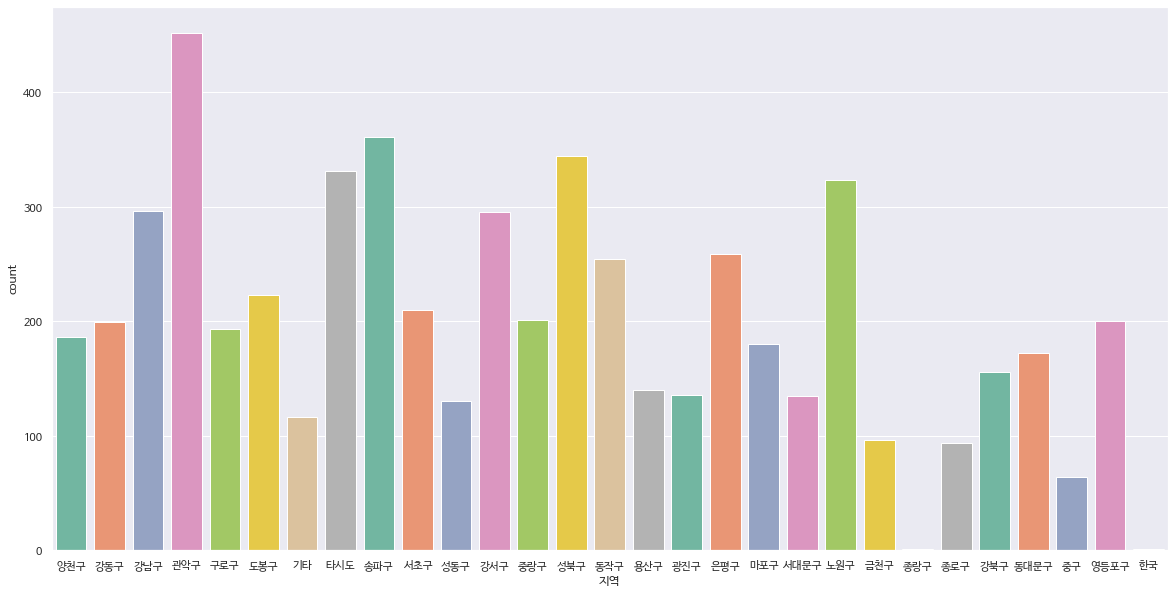

In [70]:
plt.figure(figsize=(20,10))
# 한글 출력을 위한 폰트 옵션 설정
sns.set(font="NanumBarunGothic", 
        rc={"axes.unicode_minus":False},
        style='darkgrid')
ax = sns.countplot(x="지역", data = corona_del_col, palette="Set2")

In [71]:
# 지역 이상치 데이터 처리
# replace 함수를 사용하여 해당 데이터를 변경.
# 이상치가 처리된 데이터이기에 새로운 Dataframe으로 저장함.
corona_out_region = corona_del_col.replace({'종랑구':'중랑구', '한국':'기타'})

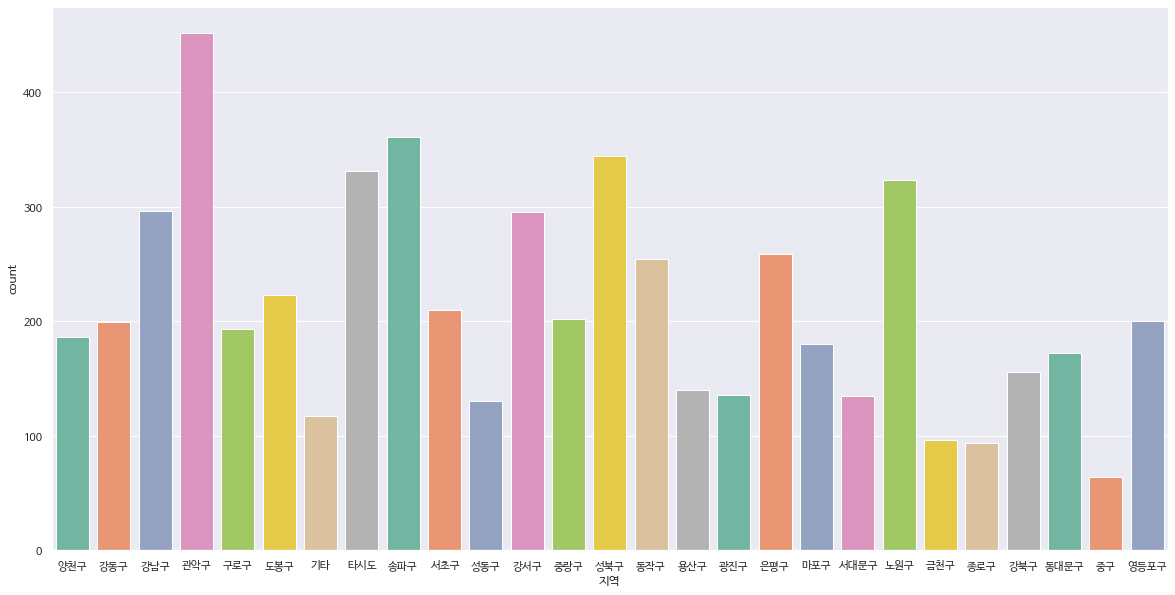

In [72]:
#이상치가 처리된 데이터를 다시 출력해 보자.
plt.figure(figsize=(20,10))
sns.set(font="NanumBarunGothic", 
        rc={"axes.unicode_minus":False},
        style='darkgrid')
ax = sns.countplot(x="지역", data=corona_out_region, palette="Set2")

In [75]:
# 논리 연산을 이용한 조건을 다음과 같이 사용하면 해당 조건에 맞는 데이터를 출력할 수 있다.
corona_out_region[corona_del_col['month'] == '8']


,연번,확진일,환자번호,지역,여행력,접촉력,상태,이동경로,등록일,수정일,노출여부,month,day
1271,4477,8.31.,20132,타시도,NaN,감염경로 조사중,퇴원,이동경로 공개기간 경과,2020-10-22 10:58,2020-10-23 9:00,Y,8,31
1272,4476,8.25.,17968,타시도,NaN,성북구 사랑제일교회 관련,NaN,이동경로 공개기간 경과,2020-10-22 10:58,2020-10-23 9:00,Y,8,25
1273,4475,8.26.,18821,타시도,NaN,타시도 확진자 접촉,퇴원,이동경로 공개기간 경과,2020-10-22 10:58,2020-10-23 9:00,Y,8,26
1274,4474,8.27.,18818,타시도,NaN,기타 확진자 접촉,퇴원,이동경로 공개기간 경과,2020-10-22 10:58,2020-10-23 9:00,Y,8,27
1504,4244,8.30.,20116,타시도,NaN,감염경로 조사중,퇴원,이동경로 공개기간 경과,2020-10-22 10:58,2020-10-23 9:00,Y,8,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4140,1608,8.2.,14382,용산구,일본,해외 접촉 추정,퇴원,이동경로 공개기간 경과,2020-10-22 10:58,2020-10-23 9:00,Y,8,2
4141,1607,8.1.,14364,양천구,NaN,송파구 확진자 접촉,퇴원,이동경로 공개기간 경과,2020-10-22 10:58,2020-10-23 9:00,Y,8,1
4142,1606,8.1.,14362,종로구,NaN,종로구 지인모임 신명투자,퇴원,이동경로 공개기간 경과,2020-10-22 10:58,2020-10-23 9:00,Y,8,1
4144,1604,8.1.,14366,강서구,NaN,강서구 요양시설관련,퇴원,이동경로 공개기간 경과,2020-10-22 10:58,2020-10-23 9:00,Y,8,1


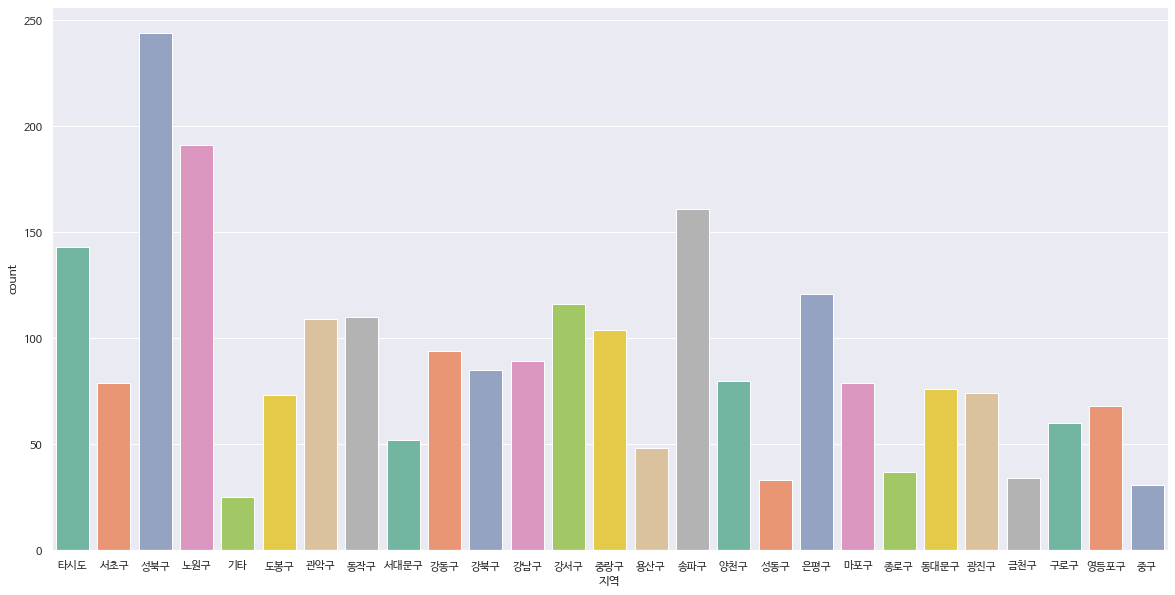

In [76]:
plt.figure(figsize=(20,10))
sns.set(font="NanumBarunGothic", 
        rc={"axes.unicode_minus":False},
        style='darkgrid')
ax = sns.countplot(x="지역", data=corona_out_region[corona_del_col['month'] == '8'], palette="Set2")

In [77]:
# 해당 column을 지정하여 series 형태로 출력할 수 있음.
corona_out_region['month'][corona_out_region['지역']=='관악구']

3       10
4       10
6       10
7       10
8       10
        ..
5630     3
5661     2
5674     2
5695     2
5711     2
Name: month, Length: 452, dtype: object

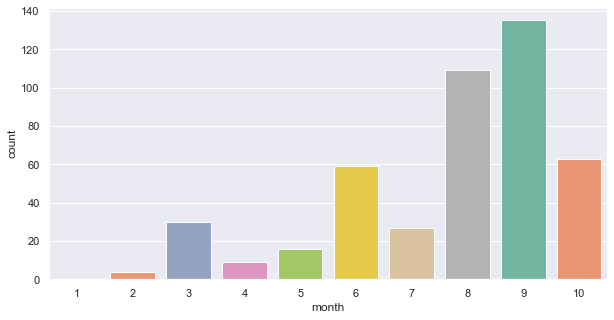

In [80]:
#그래프를 출력
plt.figure(figsize=(10,5))
sns.set(style="darkgrid")
ax = sns.countplot(x='month', data = corona_out_region[corona_out_region['지역']=='관악구'], palette="Set2", order = order)

In [1]:
# 지도 출력을 위한 라이브러리 folium을 import
import folium

# Map 함수를 사용하여 지도를 출력.
map_osm = folium.Map(location=[37.529622, 126.984307], zoom_start=11)

map_osm

ModuleNotFoundError: No module named 'folium'